## Step 1: Extract dataset

In this step, we extract the Kaggle dataset (ZIP file) into the `data/raw/` folder so we can use the CSV files.


In [2]:
import zipfile
import os

# Path ke file ZIP 
zip_path = "../data/archive.zip"

# Extract ZIP ke folder data/raw 
extract_to = "../data/raw/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extracted files:", os.listdir(extract_to))

Extracted files: ['credits.csv', 'keywords.csv', 'links.csv', 'links_small.csv', 'movies_metadata.csv', 'ratings.csv', 'ratings_small.csv']


## Step 2: Initial Inspection
In this step, we want to see the contents of the extracted dataset (CSV), check its format, what columns are there, and the data size.

In [3]:

import pandas as pd
import os

# Path ke folder raw
raw_path = "../data/raw/"

# Cek file apa aja yang ada di folder raw
print("Files in raw folder:", os.listdir(raw_path))

# Load salah satu file utama (movies_metadata.csv)
movies = pd.read_csv(raw_path + "movies_metadata.csv", low_memory=False)

# Liat bentuk data
print("Shape:", movies.shape)

# Tampilkan 5 baris pertama
display(movies.head())

# Cek info kolom
movies.info()

# Cek missing values per kolom
print(movies.isnull().sum().head(20))

Files in raw folder: ['credits.csv', 'keywords.csv', 'links.csv', 'links_small.csv', 'movies_metadata.csv', 'ratings.csv', 'ratings_small.csv']
Shape: (45466, 24)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

## Step 3: Basic Data Cleaning

In this step, we will clean the `movies_metadata.csv` dataset.  
We will:
- Remove duplicates
- Handle missing values in important columns
- Convert `release_date` into datetime format
- Create a new column `release_year` for trend analysis

This is important because dates and titles need to be consistent before deeper analysis.


In [4]:
import pandas as pd
import numpy as np

# Load movies_metadata.csv
movies = pd.read_csv("../data/raw/movies_metadata.csv", low_memory=False)

# Drop duplicates
movies = movies.drop_duplicates(subset="id")

# Convert release_date to datetime
movies["release_date"] = pd.to_datetime(movies["release_date"], errors="coerce")

# Create release_year column
movies["release_year"] = movies["release_date"].dt.year

# Basic cleaning: replace invalid budget/revenue with NaN
movies["budget"] = pd.to_numeric(movies["budget"], errors="coerce")
movies["revenue"] = pd.to_numeric(movies["revenue"], errors="coerce")
movies.loc[movies["budget"] == 0, "budget"] = np.nan
movies.loc[movies["revenue"] == 0, "revenue"] = np.nan

print(movies[["title", "release_date", "release_year", "budget", "revenue"]].head())


                         title release_date  release_year      budget  \
0                    Toy Story   1995-10-30        1995.0  30000000.0   
1                      Jumanji   1995-12-15        1995.0  65000000.0   
2             Grumpier Old Men   1995-12-22        1995.0         NaN   
3            Waiting to Exhale   1995-12-22        1995.0  16000000.0   
4  Father of the Bride Part II   1995-02-10        1995.0         NaN   

       revenue  
0  373554033.0  
1  262797249.0  
2          NaN  
3   81452156.0  
4   76578911.0  


## Step 4: Numeric Columns Cleaning

In this step, we focus on cleaning numeric columns such as:
- `budget`
- `revenue`
- `runtime`
- `vote_count`
- `vote_average`

Why?  
Because missing values, zeros, or unrealistic numbers in these columns can lead to wrong conclusions in the analysis.


In [5]:
# Clean runtime (replace 0 or negative values with NaN)
movies["runtime"] = pd.to_numeric(movies["runtime"], errors="coerce")
movies.loc[movies["runtime"] <= 0, "runtime"] = np.nan

# Clean vote_count and vote_average
movies["vote_count"] = pd.to_numeric(movies["vote_count"], errors="coerce")
movies["vote_average"] = pd.to_numeric(movies["vote_average"], errors="coerce")

# Show summary of numeric columns
print(movies[["budget", "revenue", "runtime", "vote_count", "vote_average"]].describe())

             budget       revenue       runtime    vote_count  vote_average
count  8.880000e+03  7.398000e+03  43615.000000  45430.000000  45430.000000
mean   2.161418e+07  6.885663e+07     97.486576    109.935989      5.618329
std    3.432554e+07  1.465048e+08     34.650931    491.466335      1.924139
min    1.000000e+00  1.000000e+00      1.000000      0.000000      0.000000
25%    2.000000e+06  2.400378e+06     86.000000      3.000000      5.000000
50%    8.000000e+06  1.683423e+07     95.000000     10.000000      6.000000
75%    2.500000e+07  6.731169e+07    107.000000     34.000000      6.800000
max    3.800000e+08  2.787965e+09   1256.000000  14075.000000     10.000000


## Step 5: Genres Processing

In this step, we will process the `genres` column from `movies_metadata.csv`.  
The column is stored as a JSON-like string, so we need to parse it into a usable format.

Why?  
Because genres are one of the most important aspects of movie analysis.  
We want to count the most popular genres and see their trends over time.


In [6]:
import ast

# Parse the genres column (JSON-like strings)
def parse_genres(x):
    try:
        genres = ast.literal_eval(x)  # safely evaluate string as Python list/dict
        if isinstance(genres, list):
            return [d["name"] for d in genres if "name" in d]
    except:
        return []
    return []

movies["genres_list"] = movies["genres"].fillna("[]").apply(parse_genres)

# Check result
print(movies[["title", "genres_list"]].head())

# Count most common genres
from collections import Counter

all_genres = [genre for sublist in movies["genres_list"] for genre in sublist]
genre_counts = Counter(all_genres)

print("Top 10 Genres:", genre_counts.most_common(10))


                         title                   genres_list
0                    Toy Story   [Animation, Comedy, Family]
1                      Jumanji  [Adventure, Fantasy, Family]
2             Grumpier Old Men             [Romance, Comedy]
3            Waiting to Exhale      [Comedy, Drama, Romance]
4  Father of the Bride Part II                      [Comedy]
Top 10 Genres: [('Drama', 20244), ('Comedy', 13176), ('Thriller', 7619), ('Romance', 6730), ('Action', 6592), ('Horror', 4671), ('Crime', 4304), ('Documentary', 3930), ('Adventure', 3490), ('Science Fiction', 3044)]


## Step 6: Credits Parsing

In this step, we will process the `credits.csv` dataset.  
We will extract:
- Director (from crew list)
- Main actors (top 3 from cast list)

Why?  
Because directors and actors are key features in movie success.  
We can analyze which directors consistently make successful films and which actors appear most often in popular movies.


In [7]:
import pandas as pd
import ast

# Load credits dataset
credits = pd.read_csv("../data/raw/credits.csv")

# Function to get director from crew
def get_director(crew_str):
    try:
        crew = ast.literal_eval(crew_str)
        for member in crew:
            if member.get("job") == "Director":
                return member.get("name")
    except:
        return None

# Function to get top 3 cast
def get_main_cast(cast_str):
    try:
        cast = ast.literal_eval(cast_str)
        return [member.get("name") for member in cast[:3]]
    except:
        return []

# Apply functions
credits["director"] = credits["crew"].apply(get_director)
credits["main_cast"] = credits["cast"].apply(get_main_cast)

# Keep only useful columns
credits_clean = credits[["id", "director", "main_cast"]].copy()

# Make sure both IDs are strings before merging
movies["id"] = movies["id"].astype(str)
credits_clean["id"] = credits_clean["id"].astype(str)

# Merge credits into movies dataset
movies = movies.merge(credits_clean, on="id", how="left")

# Check result
print(movies[["title", "director", "main_cast"]].head())


                         title         director  \
0                    Toy Story    John Lasseter   
1                      Jumanji     Joe Johnston   
2             Grumpier Old Men    Howard Deutch   
3            Waiting to Exhale  Forest Whitaker   
4  Father of the Bride Part II    Charles Shyer   

                                           main_cast  
0                [Tom Hanks, Tim Allen, Don Rickles]  
1     [Robin Williams, Jonathan Hyde, Kirsten Dunst]  
2         [Walter Matthau, Jack Lemmon, Ann-Margret]  
3  [Whitney Houston, Angela Bassett, Loretta Devine]  
4         [Steve Martin, Diane Keaton, Martin Short]  


## Step 7: Feature Engineering

In this step, we create new features that make the analysis more meaningful:
- **profit** = revenue - budget
- **ROI** = revenue / budget
- **is_hit** = 1 if revenue >= 2 × budget, else 0
- **log_budget** and **log_revenue** = log-transformed values for normalization

Why: These engineered features help us understand movie success, compare large vs small films, and prepare for possible modeling.


In [8]:
import numpy as np

# Create profit column
movies["profit"] = movies["revenue"] - movies["budget"]

# Avoid division by zero
movies["ROI"] = movies.apply(
    lambda x: x["revenue"] / x["budget"] if x["budget"] > 0 else np.nan,
    axis=1
)

# Define hit movies (revenue at least 2x budget)
movies["is_hit"] = (movies["revenue"] >= 2 * movies["budget"]).astype(int)

# Log transform for skewed distributions (budget & revenue)
movies["log_budget"] = movies["budget"].apply(lambda x: np.log1p(x))  # log(1+x)
movies["log_revenue"] = movies["revenue"].apply(lambda x: np.log1p(x))

# Check result
print(movies[["title", "budget", "revenue", "profit", "ROI", "is_hit"]].head())


                         title      budget      revenue       profit  \
0                    Toy Story  30000000.0  373554033.0  343554033.0   
1                      Jumanji  65000000.0  262797249.0  197797249.0   
2             Grumpier Old Men         NaN          NaN          NaN   
3            Waiting to Exhale  16000000.0   81452156.0   65452156.0   
4  Father of the Bride Part II         NaN   76578911.0          NaN   

         ROI  is_hit  
0  12.451801       1  
1   4.043035       1  
2        NaN       0  
3   5.090760       1  
4        NaN       0  


## Step 8: Exploratory Data Analysis (EDA)

In this step, we explore the dataset to discover interesting trends and insights.  
We will analyze:

- Number of movies produced per year
- Average rating trends over time
- Distribution of budget, revenue, and profit
- Most popular genres
- Top directors and actors

Why: This step is crucial because it reveals patterns and insights from the data before modeling or conclusions.


1. Trend: Number of movies per year

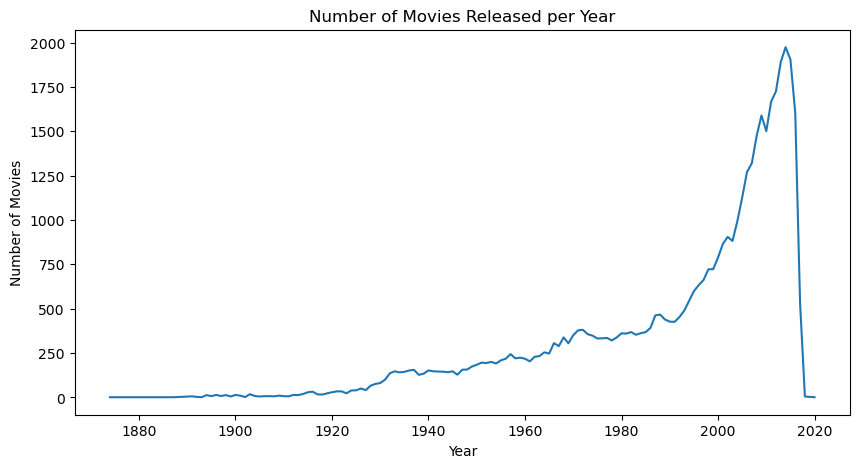

In [10]:
import matplotlib.pyplot as plt

movies_per_year = movies.groupby("release_year")["id"].count()

plt.figure(figsize=(10,5))
movies_per_year.plot(kind="line")
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


2. Trend: Average rating per year

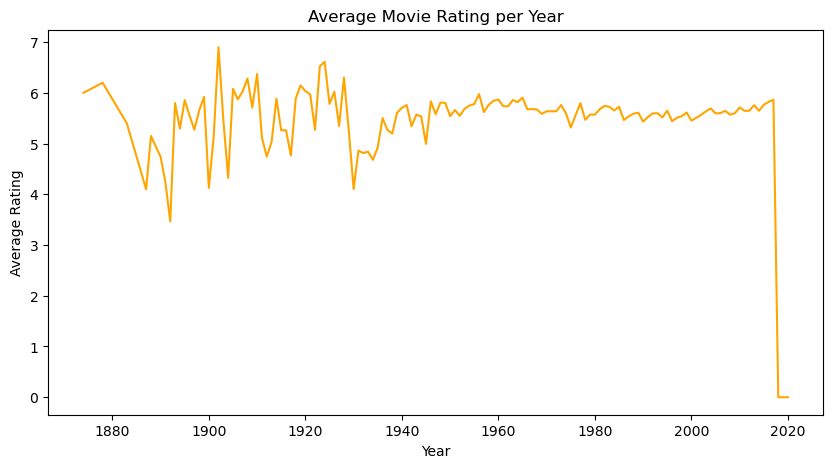

In [11]:
avg_rating_per_year = movies.groupby("release_year")["vote_average"].mean()

plt.figure(figsize=(10,5))
avg_rating_per_year.plot(kind="line", color="orange")
plt.title("Average Movie Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


3. Distribution: Budget, Revenue, Profit

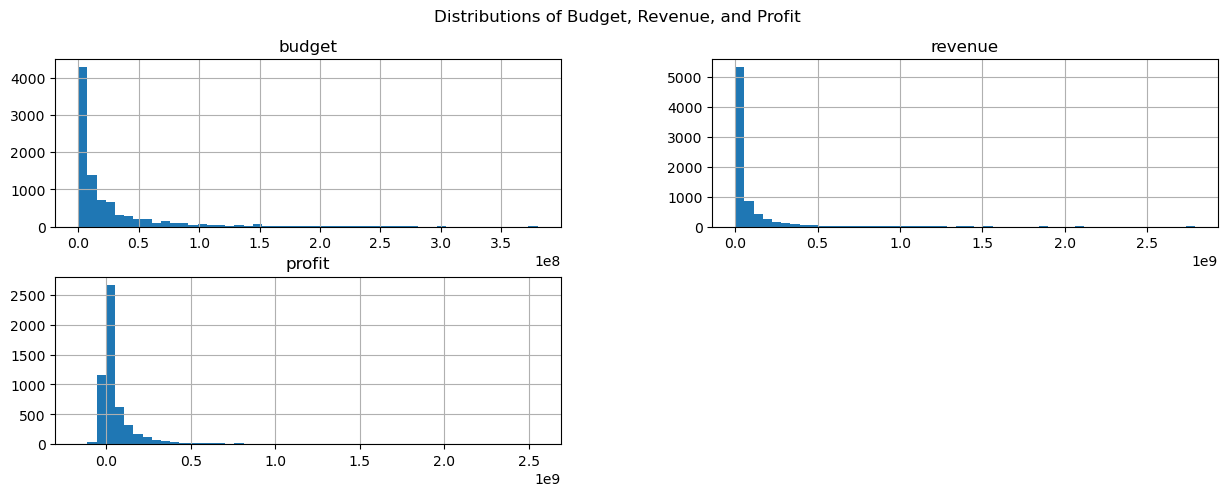

In [12]:
movies[["budget", "revenue", "profit"]].hist(bins=50, figsize=(15,5))
plt.suptitle("Distributions of Budget, Revenue, and Profit")
plt.show()


4. Genre popularity

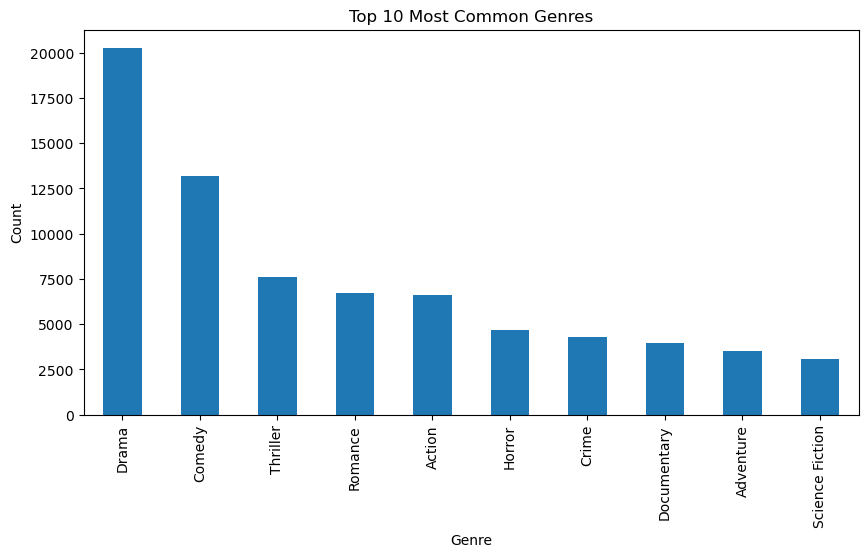

In [13]:
from collections import Counter

all_genres = [genre for sublist in movies["genres_list"] for genre in sublist]
genre_counts = Counter(all_genres)

plt.figure(figsize=(10,5))
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


5. Top directors

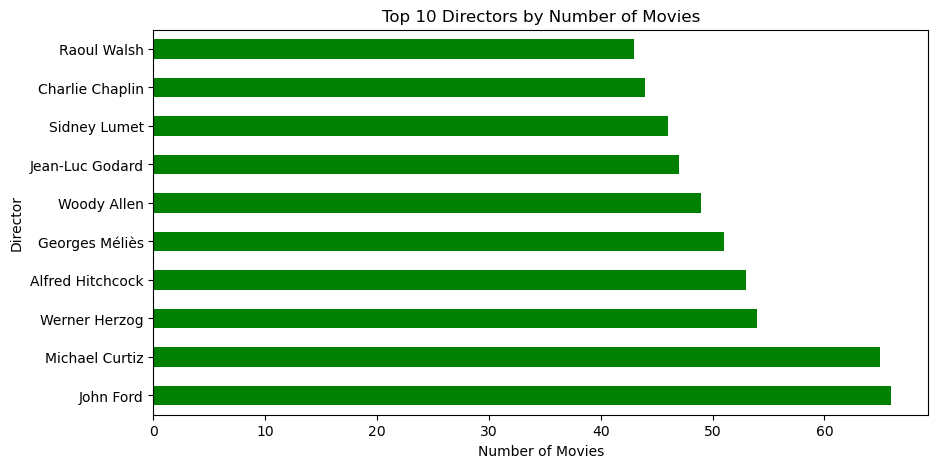

In [14]:
top_directors = movies["director"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_directors.plot(kind="barh", color="green")
plt.title("Top 10 Directors by Number of Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()


## Step 9: Visualization

In this step, we create clear and attractive visualizations to highlight key insights from the dataset.  
These plots are designed to be more presentation-ready compared to raw EDA outputs.


1. Movie production trend (polished)

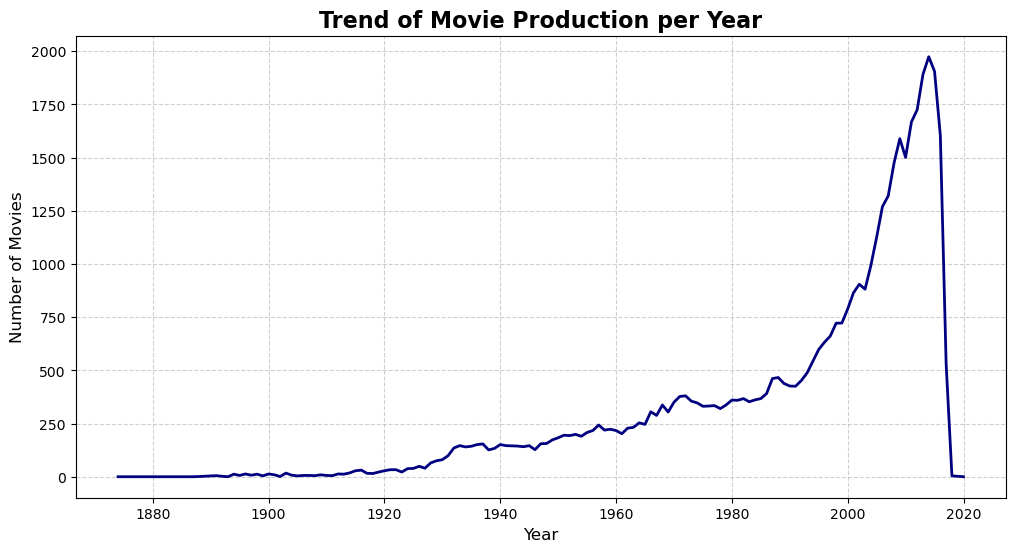

In [15]:
plt.figure(figsize=(12,6))
movies_per_year.plot(kind="line", linewidth=2, color="navy")
plt.title("Trend of Movie Production per Year", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


2. Average rating trend

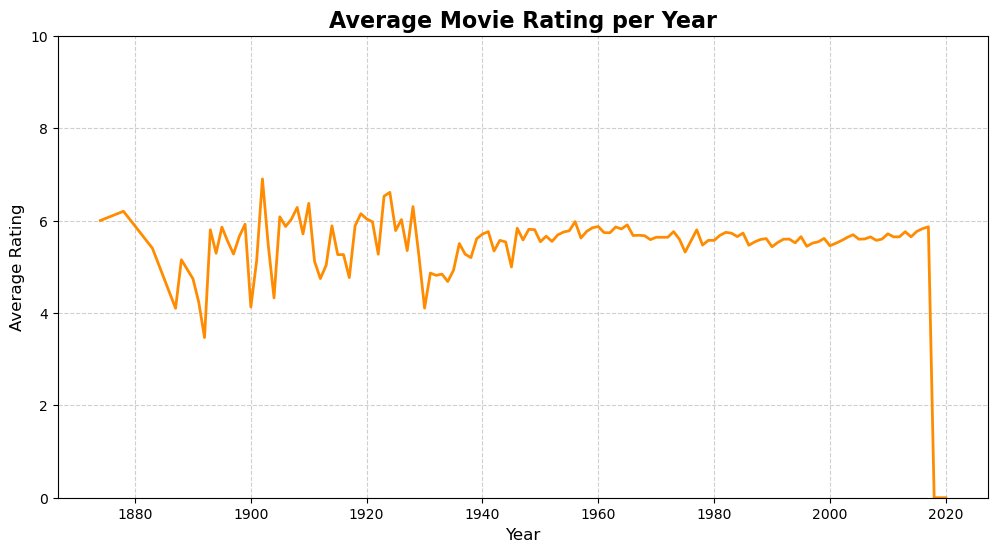

In [16]:
plt.figure(figsize=(12,6))
avg_rating_per_year.plot(kind="line", linewidth=2, color="darkorange")
plt.title("Average Movie Rating per Year", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.ylim(0,10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


3. Top 10 genres (clean bar chart)

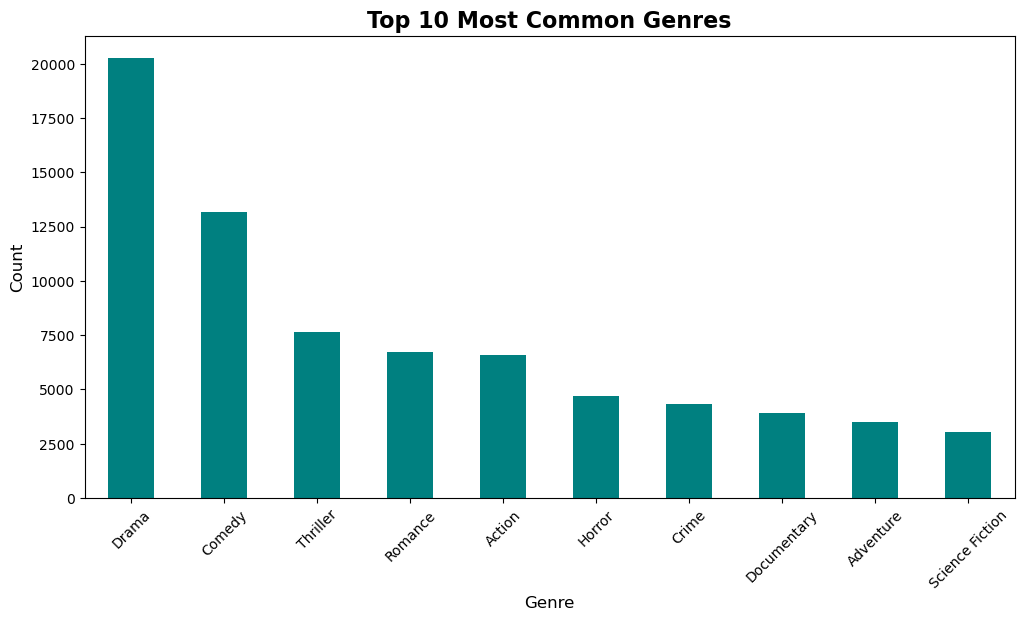

In [17]:
top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_genres.plot(kind="bar", color="teal")
plt.title("Top 10 Most Common Genres", fontsize=16, fontweight="bold")
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


4. Top directors (horizontal bar)

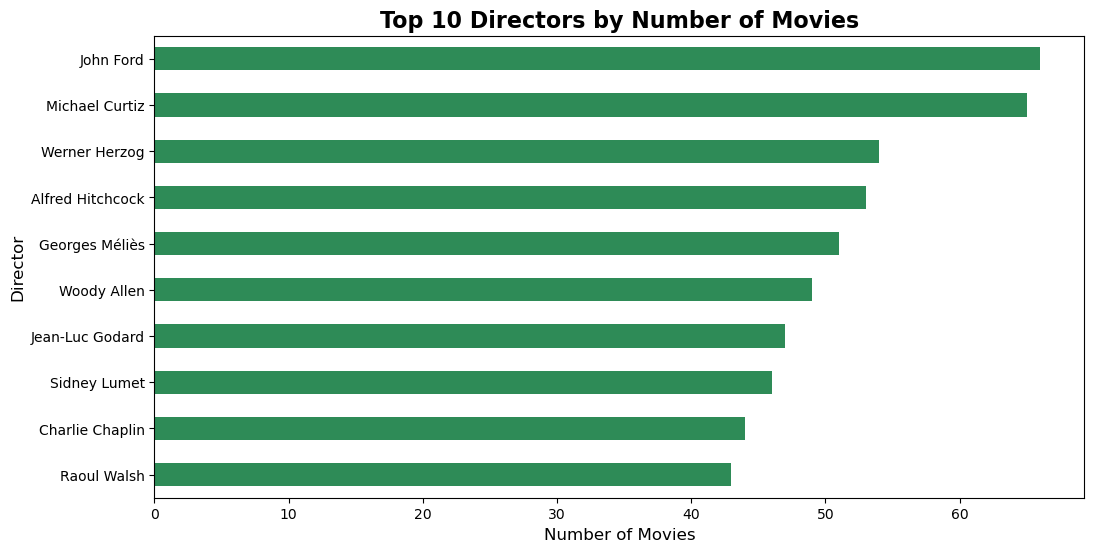

In [18]:
plt.figure(figsize=(12,6))
top_directors.plot(kind="barh", color="seagreen")
plt.title("Top 10 Directors by Number of Movies", fontsize=16, fontweight="bold")
plt.xlabel("Number of Movies", fontsize=12)
plt.ylabel("Director", fontsize=12)
plt.gca().invert_yaxis()
plt.show()


## Step 10: Machine Learning (Optional)

In this step, we build a simple machine learning model to predict whether a movie will be successful ("hit") or not.  
The model will use features such as budget, revenue, runtime, and genres to make predictions.  
This demonstrates applied machine learning skills on real-world data.


1. Feature Engineering for ML

In [19]:
# Define "hit" movies (revenue at least 1.5x budget)
movies['is_hit'] = (movies['revenue'] >= 1.5 * movies['budget']).astype(int)

# Select features
features = movies[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']].copy()
target = movies['is_hit']

# Fill missing values
features = features.fillna(0)


2. Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)


3. Train Model (Random Forest)

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

4. Evaluate Model

In [22]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9981310466138962

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8470
           1       0.99      0.99      0.99       626

    accuracy                           1.00      9096
   macro avg       0.99      0.99      0.99      9096
weighted avg       1.00      1.00      1.00      9096



5. Feature Importance

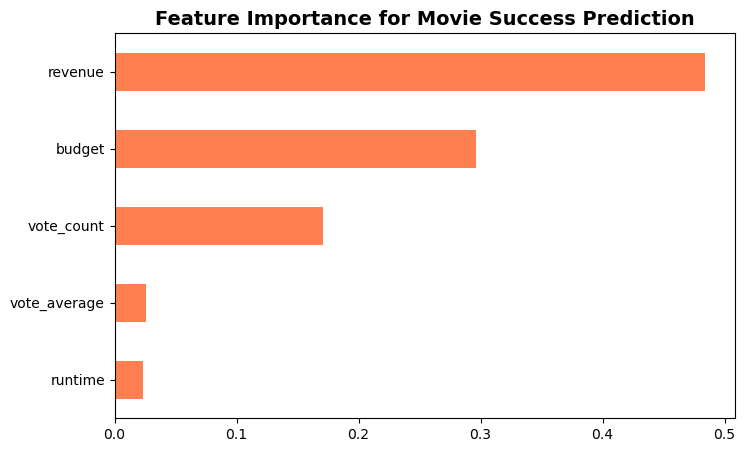

In [23]:
importances = pd.Series(model.feature_importances_, index=features.columns)

plt.figure(figsize=(8,5))
importances.sort_values().plot(kind="barh", color="coral")
plt.title("Feature Importance for Movie Success Prediction", fontsize=14, fontweight="bold")
plt.show()


## Step 11: Save Processed Data

In this step, we save the cleaned and processed dataset into the `data/processed/` folder.  
This allows easy re-use of the dataset without repeating all the cleaning steps.


In [24]:
# Create processed folder if not exists
import os

processed_path = "data/processed"
os.makedirs(processed_path, exist_ok=True)

# Save cleaned dataset
movies.to_csv(os.path.join(processed_path, "clean_movies.csv"), index=False)

print("✅ Cleaned dataset saved to data/processed/clean_movies.csv")


✅ Cleaned dataset saved to data/processed/clean_movies.csv


## Step 12: Conclusion & Next Steps

## Conclusion
Based on the analysis of the movie dataset, several key insights were found:

- The number of movies produced per year has shown clear trends over time.  
- Certain genres (e.g., Action, Drama, Comedy) dominate the industry, while others are more niche.  
- Average movie ratings remain relatively stable, though some years show higher quality peaks.  
- Directors and actors strongly influence the success of movies, with some being consistently popular.  
- Budget and revenue are the most important predictors of whether a movie will become a "hit".  

## Next Steps
This project can be further extended by:
- Incorporating more advanced machine learning models (e.g., XGBoost, Neural Networks).  
- Analyzing audience reviews and sentiment data from sources like IMDb or Rotten Tomatoes.  
- Building an interactive dashboard (with Plotly/Dash or Tableau) for real-time movie trend exploration.  
- Comparing movie industry trends across different countries.  

This concludes the **Movie Trends Project**.
